In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import scipy
import pylab as pl
import numpy as np
import scipy.optimize as opt
%matplotlib inline


In [4]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


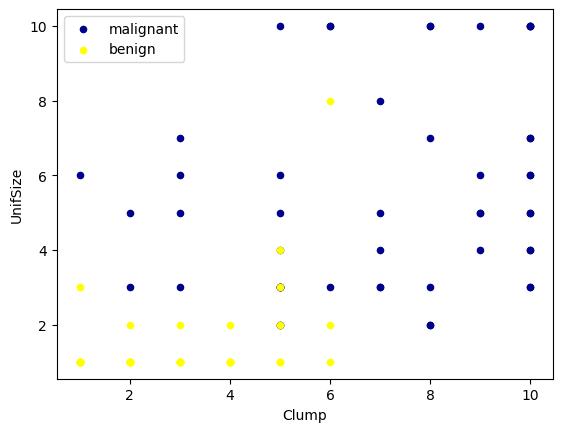

In [32]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [5]:
print(len(cell_df))
print(len(cell_df.columns))

699
11


In [7]:
print(cell_df.columns)
cell_df.info()

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 57.4+ KB


In [8]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [69]:
X = np.asarray(cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']])
cell_df['Class'] = cell_df['Class'].astype('int')
Y= np.asarray(cell_df['Class'])


In [70]:
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [71]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [73]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


[4 4 2 2 2 2 2 2 4 2 2 2 2 2 4 4 2 4 2 4 4 2 4 2 2 2 4 4 2 4 2 4 4 4 2 2 4
 2 4 4 2 4 4 2 2 4 2 4 2 4 2 2 2 4 2 4 4 2 2 4 2 2 2 4 2 2 4 4 2 2 4 2 2 2
 4 4 2 2 4 4 4 4 2 4 2 4 2 2 4 2 2 4 2 4 2 2 4 2 2 2 2 2 4 2 4 4 2 2 4 2 4
 4 4 2 2 2 4 2 2 2 4 4 2 2 2 2 4 2 4 2 2 2 4 4 4 2 2]
[4 4 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 2 4 4 2 4 2 2 2 4 4 2 4 2 4 4 4 2 2 4
 2 4 4 2 4 4 2 2 4 2 4 2 4 2 2 2 4 2 4 4 2 2 4 2 2 2 4 2 2 4 4 2 2 4 2 2 2
 4 4 2 2 4 4 4 4 2 4 2 4 2 2 4 2 2 4 2 2 2 2 4 4 2 2 2 2 4 2 4 2 2 2 4 2 4
 4 4 2 2 2 4 2 2 2 4 4 2 2 2 2 4 2 4 2 2 2 4 4 4 2 2]
model3:Test set Accuracy:  0.9708029197080292
Confusion matrix, without normalization
[[78  1]
 [ 3 55]]
              precision    recall  f1-score   support

           2       0.96      0.99      0.97        79
           4       0.98      0.95      0.96        58

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



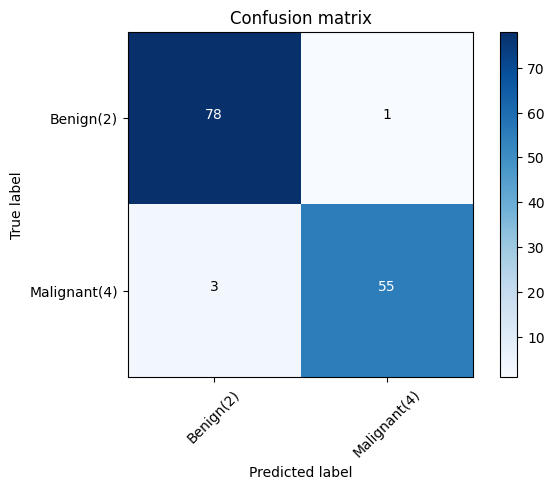

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import jaccard_score
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat
yhat_prob = LR.predict_proba(X_test)
yhat_prob
print(y_test)
print(yhat)

print("model3:Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')
print (classification_report(y_test, yhat))


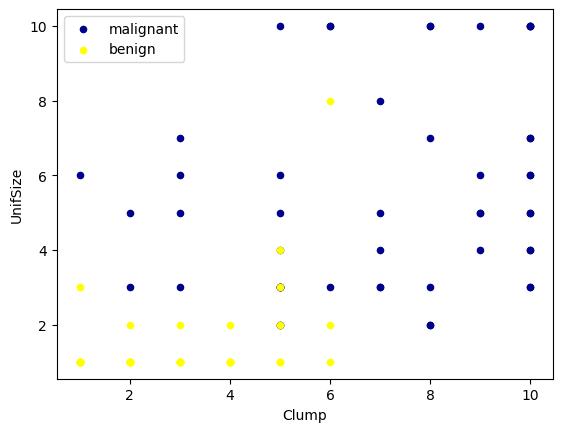

In [75]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

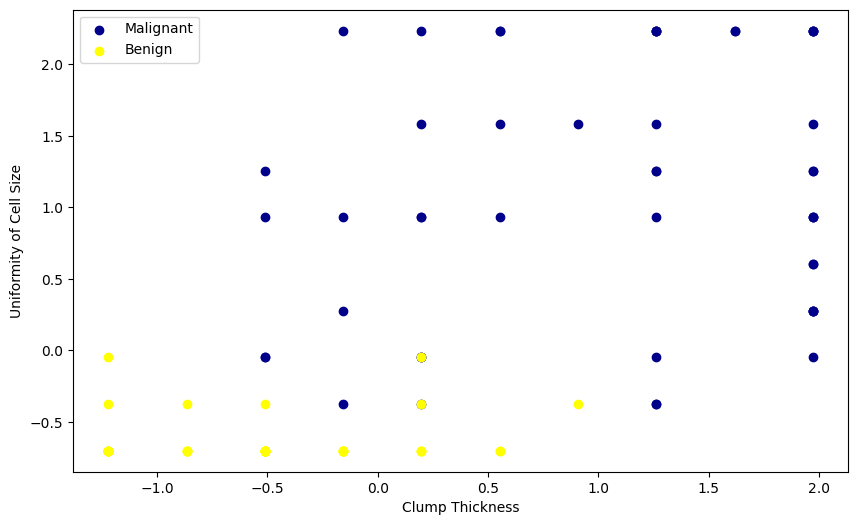

In [76]:
import matplotlib.pyplot as plt

# Assuming you have predicted values yhat after running your model
# For example:
# yhat = clf.predict(X_test)

# Create scatter plots for malignant (Class 4) and benign (Class 2) samples
plt.figure(figsize=(10, 6))

# Scatter plot for malignant (Class 4)
plt.scatter(X_test[yhat == 4][:50, 0], X_test[yhat == 4][:50, 1], c='DarkBlue', label='Malignant')

# Scatter plot for benign (Class 2)
plt.scatter(X_test[yhat == 2][:50, 0], X_test[yhat == 2][:50, 1], c='Yellow', label='Benign')

# Add labels and a legend
plt.xlabel('Clump Thickness')
plt.ylabel('Uniformity of Cell Size')
plt.legend()

# Show the scatter plot
plt.show()


0.9285714285714286
model3:Test set Accuracy:  0.9562043795620438
Confusion matrix, without normalization
[[78  1]
 [ 5 53]]
              precision    recall  f1-score   support

           2       0.94      0.99      0.96        79
           4       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



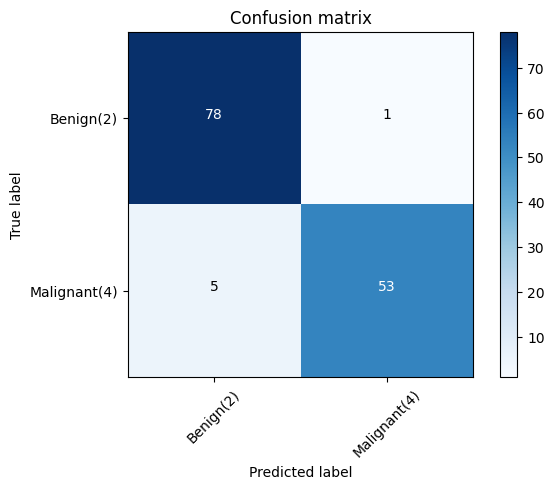

In [77]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 7).fit(X_train,y_train)
yhat =knn.predict(X_test)
yhat
yhat_prob = knn.predict_proba(X_test)
yhat_prob

print(jaccard_score(y_test, yhat,pos_label=2))
print("model3:Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')
print (classification_report(y_test, yhat))

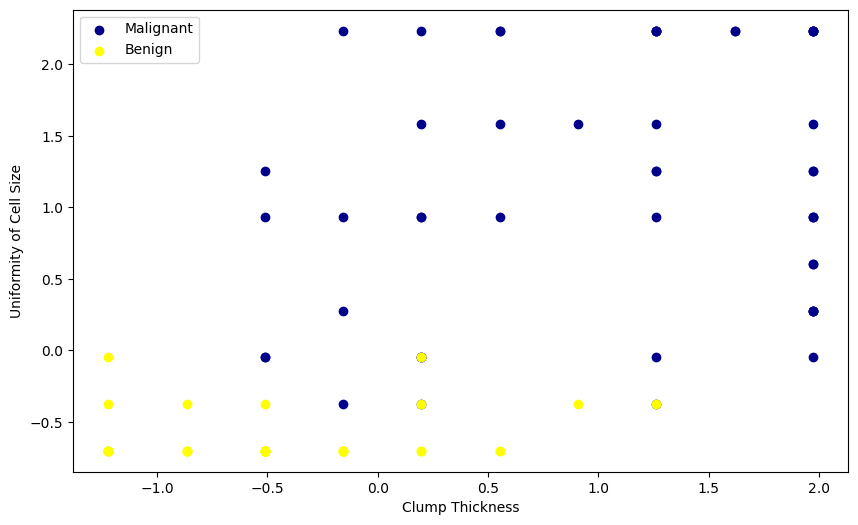

In [78]:
import matplotlib.pyplot as plt

# Assuming you have predicted values yhat after running your model
# For example:
# yhat = clf.predict(X_test)

# Create scatter plots for malignant (Class 4) and benign (Class 2) samples
plt.figure(figsize=(10, 6))

# Scatter plot for malignant (Class 4)
plt.scatter(X_test[yhat == 4][:50, 0], X_test[yhat == 4][:50, 1], c='DarkBlue', label='Malignant')

# Scatter plot for benign (Class 2)
plt.scatter(X_test[yhat == 2][:50, 0], X_test[yhat == 2][:50, 1], c='Yellow', label='Benign')

# Add labels and a legend
plt.xlabel('Clump Thickness')
plt.ylabel('Uniformity of Cell Size')
plt.legend()

# Show the scatter plot
plt.show()


0.9397590361445783
model3:Test set Accuracy:  0.9635036496350365
Confusion matrix, without normalization
[[78  1]
 [ 4 54]]
              precision    recall  f1-score   support

           2       0.95      0.99      0.97        79
           4       0.98      0.93      0.96        58

    accuracy                           0.96       137
   macro avg       0.97      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



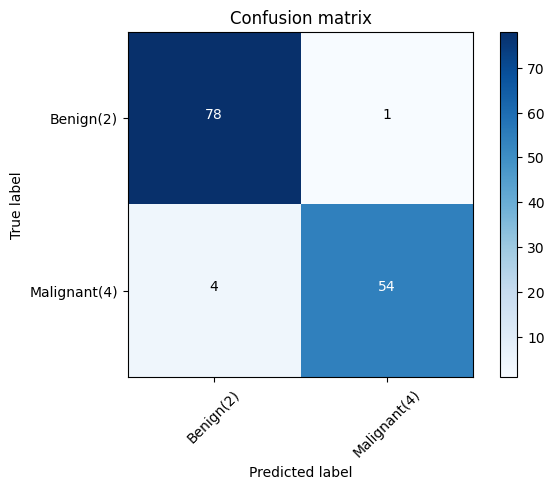

In [79]:
from sklearn.tree import DecisionTreeClassifier
 
Dtree=DecisionTreeClassifier(criterion="entropy", max_depth =8)
Dtree.fit(X_train,y_train)
yhat =Dtree.predict(X_test)
yhat
yhat_prob = Dtree.predict_proba(X_test)
yhat_prob

print(jaccard_score(y_test, yhat,pos_label=2))
print("model3:Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')
print (classification_report(y_test, yhat))

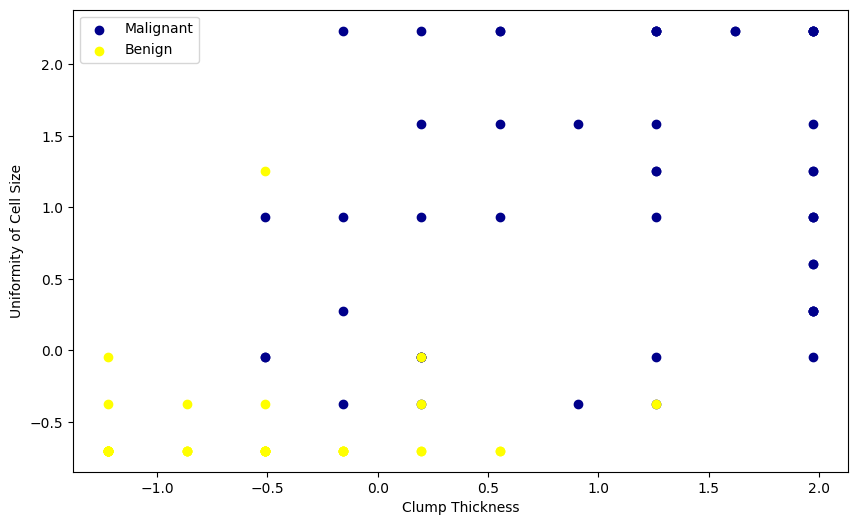

In [80]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Scatter plot for malignant (Class 4)
plt.scatter(X_test[yhat == 4][:50, 0], X_test[yhat == 4][:50, 1], c='DarkBlue', label='Malignant')

# Scatter plot for benign (Class 2)
plt.scatter(X_test[yhat == 2][:50, 0], X_test[yhat == 2][:50, 1], c='Yellow', label='Benign')

# Add labels and a legend
plt.xlabel('Clump Thickness')
plt.ylabel('Uniformity of Cell Size')
plt.legend()

# Show the scatter plot
plt.show()


0.9506172839506173
model3:Test set Accuracy:  0.9708029197080292
Confusion matrix, without normalization
[[77  2]
 [ 2 56]]
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        79
           4       0.97      0.97      0.97        58

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



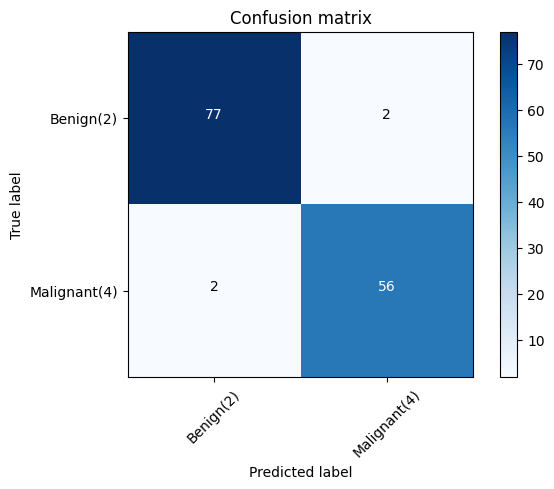

In [81]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid', C=0.5)
clf.fit(X_train, y_train) 
yhat =clf.predict(X_test)
yhat


print(jaccard_score(y_test, yhat,pos_label=2))
print("model3:Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')
print (classification_report(y_test, yhat))

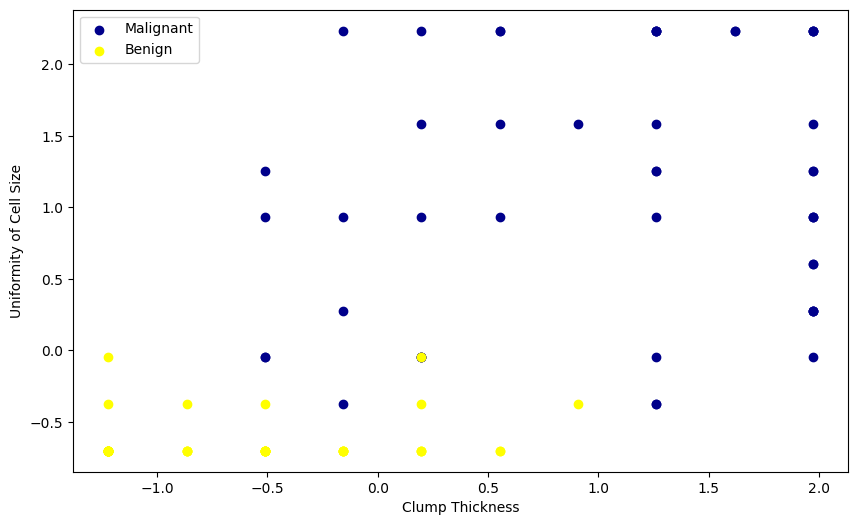

In [82]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Scatter plot for malignant (Class 4)
plt.scatter(X_test[yhat == 4][:50, 0], X_test[yhat == 4][:50, 1], c='DarkBlue', label='Malignant')

# Scatter plot for benign (Class 2)
plt.scatter(X_test[yhat == 2][:50, 0], X_test[yhat == 2][:50, 1], c='Yellow', label='Benign')

# Add labels and a legend
plt.xlabel('Clump Thickness')
plt.ylabel('Uniformity of Cell Size')
plt.legend()

# Show the scatter plot
plt.show()
